In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [93]:
def compute_mse(y, tx, w):
    """Calculate the mse loss.
    """
    # ***************************************************
    return  np.mean((y- np.dot(tx,w))**2)*0.5
    # ***************************************************

In [94]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    w=np.linalg.solve(tx.T @ tx, tx.T @ y)   
    mse=compute_mse(y, tx, w)
    return mse,w
    # returns mse, and optimal weights
    # ***************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for i,row in enumerate(w0):
        for j,col in enumerate(w1):
            losses[i,j]=compute_mse(y,tx,(row,col))
    # ***************************************************
    return losses

In [12]:
def build_model_data(height, weight):
    """Form (y,tX) to get regression data in matrix form."""
    y = weight
    x = height
    num_samples = len(y)
    tx = np.c_[np.ones(num_samples), x]  # (N,) and (N,) construct an NX2 matrix
    return y, tx

In [13]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    grid_w0= np.linspace(-100, 200, 10)
    grid_w1=np.linspace(-150, 150, 10)
    losse_grid_search=grid_search(y,tx,grid_w0,grid_w1)
    losse_least_squares,w_least_square=least_squares(y,tx)
    print('Best losse for grid search: {0}'.format(np.min(losse_grid_search)))
    print('Losse for least squares: {0} and optimal weight is {1}'.format(losse_least_squares,w_least_square))
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return 

Test it here

In [14]:
test_your_least_squares()

Best losse for grid search: 42.42448314678248
Losse for least squares: 15.3858878688294 and optimal weight is [73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [15]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [16]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    expand=np.ones((x.shape[0],1))
    for i in range(1,degree+1):
        expand=np.hstack((expand,x.reshape((-1,1))**i))
    # ***************************************************
    return expand

In [17]:
x.shape
build_poly(x,2)

array([[1.00000000e+00, 3.52374910e-01, 1.24168077e-01],
       [1.00000000e+00, 4.89512330e+00, 2.39622321e+01],
       [1.00000000e+00, 1.86662437e+00, 3.48428655e+00],
       [1.00000000e+00, 3.50706129e+00, 1.22994789e+01],
       [1.00000000e+00, 3.38087384e+00, 1.14303079e+01],
       [1.00000000e+00, 7.30937276e-01, 5.34269301e-01],
       [1.00000000e+00, 3.88562366e+00, 1.50980712e+01],
       [1.00000000e+00, 5.65224803e+00, 3.19479078e+01],
       [1.00000000e+00, 6.28318531e+00, 3.94784176e+01],
       [1.00000000e+00, 2.37137419e+00, 5.62341557e+00],
       [1.00000000e+00, 6.04749821e-01, 3.65722346e-01],
       [1.00000000e+00, 3.63324875e+00, 1.32004965e+01],
       [1.00000000e+00, 8.57124731e-01, 7.34662804e-01],
       [1.00000000e+00, 2.49756165e+00, 6.23781420e+00],
       [1.00000000e+00, 1.61424946e+00, 2.60580133e+00],
       [1.00000000e+00, 5.39987312e+00, 2.91586297e+01],
       [1.00000000e+00, 6.15699785e+00, 3.79086225e+01],
       [1.00000000e+00, 6.03081

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [18]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        x_expand=build_poly(x, degree)
        # ***************************************************
        # ***************************************************
        mse,weights=least_squares(y,x_expand)
        rmse=np.sqrt(2*mse)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248674


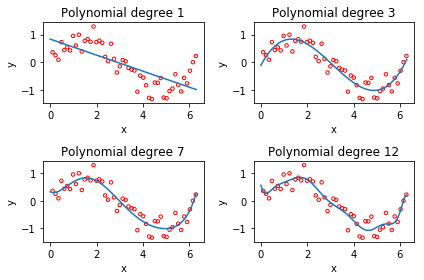

In [19]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [103]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    indices=np.arange(len(y))
    np.random.shuffle(indices)
    
    splits=[int(len(y)*ratio)]      #.cum() if severals
    
    x_train,x_test=np.split(x[indices],splits)
    y_train,y_test=np.split(y[indices],splits)
    
    return x_train,y_train,x_test,y_test
    # ***************************************************

Then, test your `split_data` function below.

In [104]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    
    x_train,y_train,x_test,y_test=split_data(x, y, ratio,seed)
    
    x_train_expand= build_poly(x_train, degree)
    y_train_expand= build_poly(y_train, degree)
    x_test_expand = build_poly(x_test, degree)
    y_test_expand = build_poly(y_test, degree)
    
    mse_tr,w=least_squares(y_train_expand, x_train_expand)
    mse_te=compute_mse(y_test_expand,x_test_expand,w)
    
    rmse_tr=np.sqrt(2*mse_tr)
    rmse_te=np.sqrt(2*mse_te)
    
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [105]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.349, Testing RMSE=0.128
proportion=0.9, degree=3, Training RMSE=0.394, Testing RMSE=0.309
proportion=0.9, degree=7, Training RMSE=0.883, Testing RMSE=0.703
proportion=0.9, degree=12, Training RMSE=2.627, Testing RMSE=2.808
proportion=0.5, degree=1, Training RMSE=0.321, Testing RMSE=0.375
proportion=0.5, degree=3, Training RMSE=0.371, Testing RMSE=0.431
proportion=0.5, degree=7, Training RMSE=0.844, Testing RMSE=1.082
proportion=0.5, degree=12, Training RMSE=2.588, Testing RMSE=4.194
proportion=0.1, degree=1, Training RMSE=0.302, Testing RMSE=0.378
proportion=0.1, degree=3, Training RMSE=0.192, Testing RMSE=0.584
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=18.510
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=130.412


# 3 Ridge Regression
Please fill in the function below.

In [109]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    w=np.linalg.solve(tx.T @ tx  + lambda_* 2*len(y) *np.identity(tx.shape[1]) ,tx.T @ y)
    return w
    # ***************************************************

In [110]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    x_train,y_train,x_test,y_test=split_data(x,y,ratio,seed)
    
    x_train_expand= build_poly(x_train, degree)
    x_test_expand = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):

        w=ridge_regression(y_train, x_train_expand, lambda_)

        rmse_tr.append(np.sqrt(2*compute_mse(y_train, x_train_expand, w)))
        rmse_te.append(np.sqrt(2*compute_mse(y_test, x_test_expand, w)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.229, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.229, Testing RMSE=0.328
proportion=0.5, degree=7, lambda=0.193, 

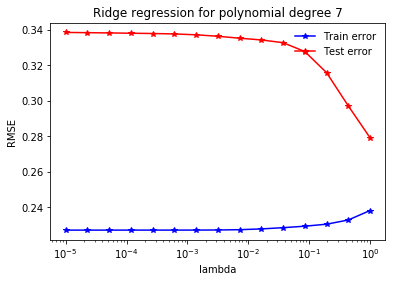

In [111]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)